In [2]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
#file is zipped first use zipfile function to unzip the file
power_data = zipfile.ZipFile('household_power_consumption.zip')
# Now use this code to extract the txt file into a variable named temp(can be any name of your chosing)
power_data.extractall('temp')

In [4]:
#Now use this code to read the file as a csv specifying the seperator as ';' as this was what was used to create the text file
# also u can remove some of the hyperparameters i used inside of the read_csv function.
df = pd.read_csv('household_power_consumption.zip', sep=';',na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [5]:

df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [6]:
df.shape

(2075259, 7)

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df['Sub_metering_1']

datetime
2006-12-16 17:24:00    0.0
2006-12-16 17:25:00    0.0
2006-12-16 17:26:00    0.0
2006-12-16 17:27:00    0.0
2006-12-16 17:28:00    0.0
                      ... 
2010-11-26 20:58:00    0.0
2010-11-26 20:59:00    0.0
2010-11-26 21:00:00    0.0
2010-11-26 21:01:00    0.0
2010-11-26 21:02:00    0.0
Name: Sub_metering_1, Length: 2075259, dtype: float64

In [10]:
df.info

<bound method DataFrame.info of                      Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                

In [11]:

df.isnull().values.any() 

True

In [12]:
#we have 181853 missing data in the dataframe
df.isnull().values.sum() 

181853

In [13]:
#Filling missing data by imputation - Forward fill
df = df.fillna(method= 'ffill' )
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
df.isnull().values.any() 

False

In [15]:
#Downsampling of the data to two months interval
df_daily = df.resample('D').sum()
print(df_daily.head())

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime                                                                      
2006-12-16            5180.8             0.0           546.0          4926.0  
2006-12-17           14398.6          2033.0          4187.0         13341.0  
2006-12-18            9247.2          1063.0          2621.0         14018.0  
2006-12-19            7094.0           839.0          7602.0          6197.0  
2006-12-20            9313.0             0

Text(0, 0.5, 'Energy Comsumed')

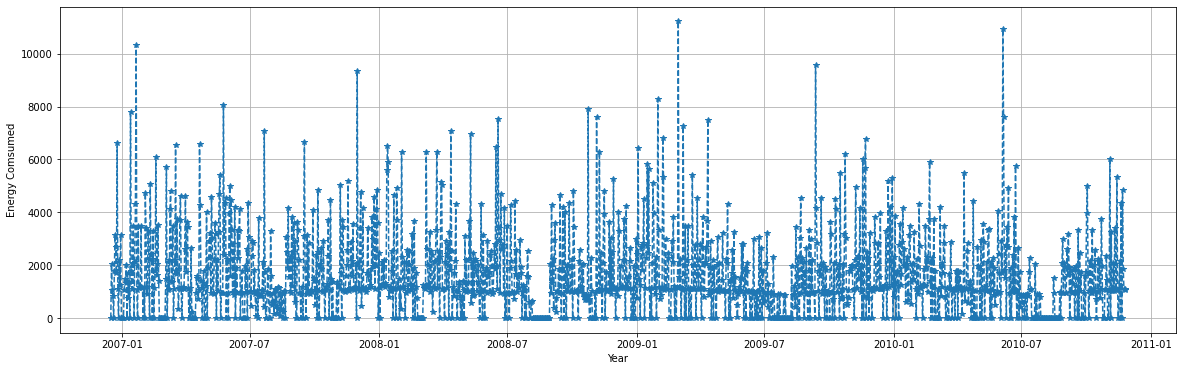

In [19]:
plt.figure(figsize=( 20 , 6 ))
plt.plot(df_daily.index, df_daily['Sub_metering_1'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Energy Comsumed' )

Text(0, 0.5, 'Energy Consumed')

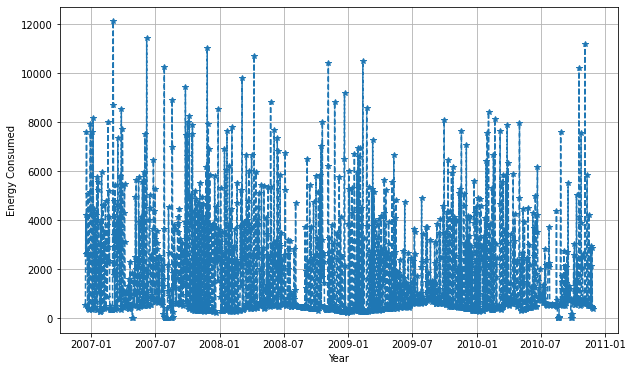

In [20]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily['Sub_metering_2'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Energy Consumed' )

Text(0, 0.5, 'Energy Consumed')

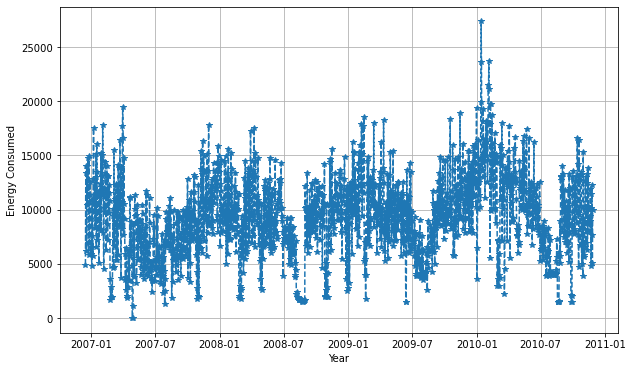

In [21]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily['Sub_metering_3'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Energy Consumed' )

Text(0.5, 1.0, 'Plot of Global_active_power over time')

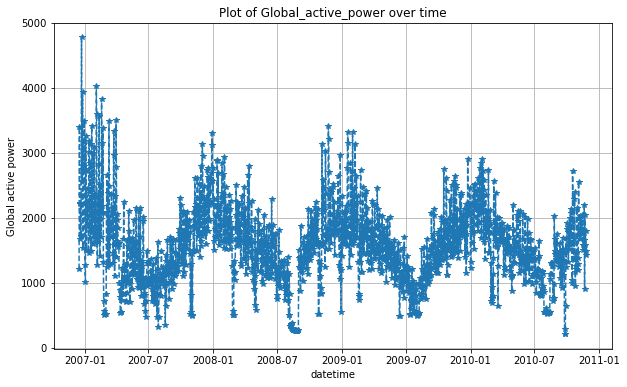

In [22]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('datetime')
plt.ylabel('Global active power')
plt.title('Plot of Global_active_power over time')

In [23]:
import scipy
import scipy.stats
from scipy.stats import pearsonr

In [24]:
corr2,_ = pearsonr(df_daily.Voltage,df_daily.Global_intensity)
corr2

0.05359784806671143

In [25]:
train_data = df_daily.iloc[:1077,:]

In [26]:
train_data.shape

(1077, 7)

In [27]:
test_data = df_daily.iloc[1077:,:] 

In [28]:
test_data.shape


(365, 7)

In [29]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [30]:
#(p,d,q)
train_data.reset_index(inplace = True)
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [31]:
df_train = train_data.iloc[:,:2]

In [32]:
df_train = df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_train.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [33]:
test_data.reset_index(inplace = True)
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
2,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
3,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
4,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0


In [34]:
df_tests = test_data.iloc[:,:2]

In [35]:
df_tests = df_tests.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_tests.head()

,ds,y
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378


In [36]:
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1564.085514,1538.641851,2704.675493,1564.085514,1564.085514,528.395248,528.395248,528.395248,-59.098817,-59.098817,-59.098817,587.494065,587.494065,587.494065,0.0,0.0,0.0,2092.480762
1,2009-11-28,1564.165703,1809.993067,2947.213846,1564.165703,1564.165703,818.679349,818.679349,818.679349,238.674326,238.674326,238.674326,580.005024,580.005024,580.005024,0.0,0.0,0.0,2382.845052
2,2009-11-29,1564.245892,1754.778490,2905.236666,1564.245892,1564.245892,791.276980,791.276980,791.276980,220.722330,220.722330,220.722330,570.554650,570.554650,570.554650,0.0,0.0,0.0,2355.522872
3,2009-11-30,1564.326081,1430.734443,2507.066884,1564.326081,1564.326081,397.953915,397.953915,397.953915,-161.715339,-161.715339,-161.715339,559.669253,559.669253,559.669253,0.0,0.0,0.0,1962.279995
4,2009-12-01,1564.406270,1541.200567,2643.635199,1564.406270,1564.406270,523.519389,523.519389,523.519389,-24.374983,-24.374983,-24.374983,547.894372,547.894372,547.894372,0.0,0.0,0.0,2087.925659


In [38]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2092.480762,1538.641851,2704.675493,1564.085514,1564.085514,1564.085514
1,2009-11-28,2382.845052,1809.993067,2947.213846,1564.165703,1564.165703,1564.165703
2,2009-11-29,2355.522872,1754.778490,2905.236666,1564.245892,1564.245892,1564.245892
3,2009-11-30,1962.279995,1430.734443,2507.066884,1564.326081,1564.326081,1564.326081
4,2009-12-01,2087.925659,1541.200567,2643.635199,1564.406270,1564.406270,1564.406270


In [39]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [40]:
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

the Mean Average Percentage Error ( MAPE) is: 26.21


In [43]:
from sklearn import metrics

In [44]:
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,4)

401.8276

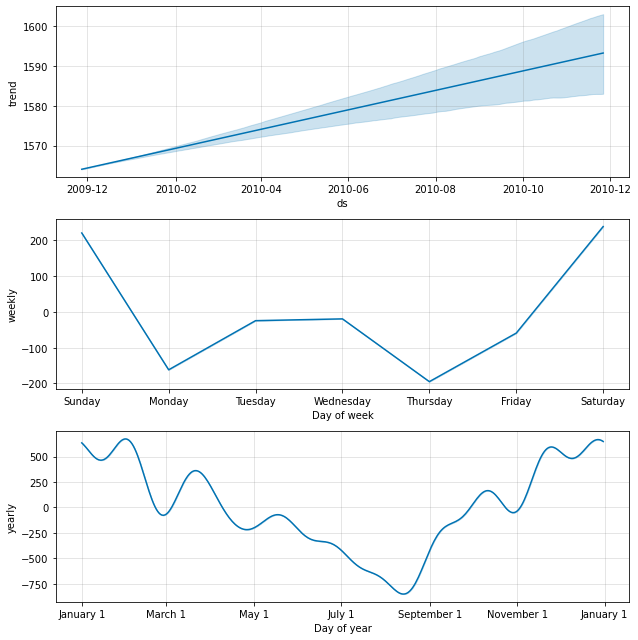

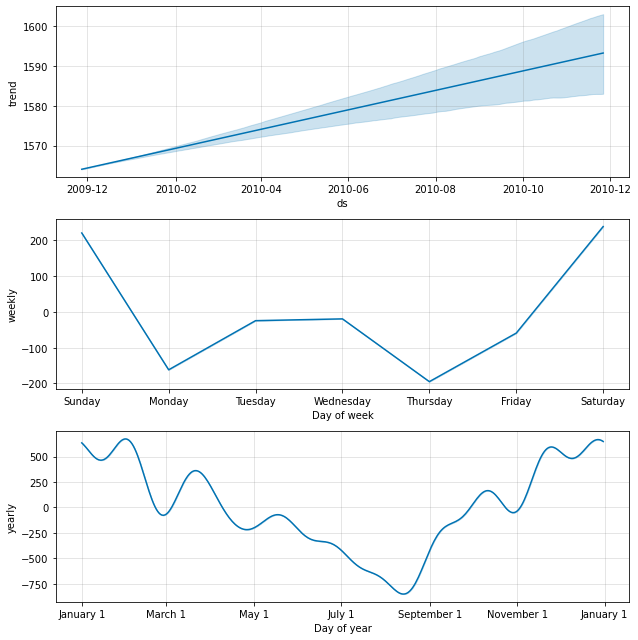

In [42]:
model.plot_components(forecast)

In [46]:
df_daily.reset_index(inplace=True)

In [47]:
df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [48]:
New_df_daily = df_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [49]:
#taking the first hundred observations for training
New_train = New_df_daily.iloc[:1077,:]
New_test = New_df_daily.iloc[1077:,:]
print(New_test.shape)
print(New_train.shape)

(365, 8)
(1077, 8)


In [50]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [51]:
#fitting the model to train data
model = model.fit(New_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
#making prediction with test set
prediction = model.predict(New_test)

In [53]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [54]:
MAPE = Metric(New_test['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:2.84


In [55]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(New_test['y'],prediction['yhat']))
RMSE
round(RMSE,4)

40.14

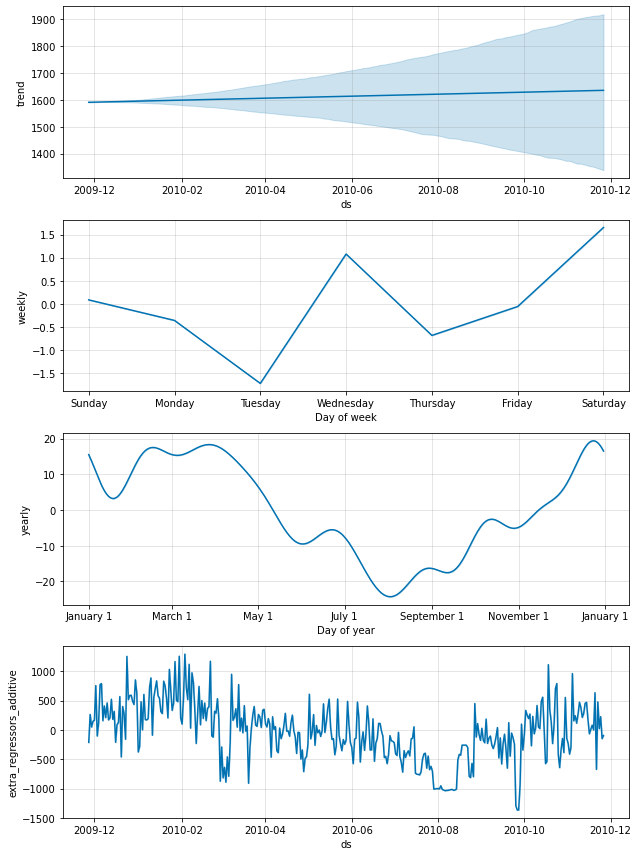

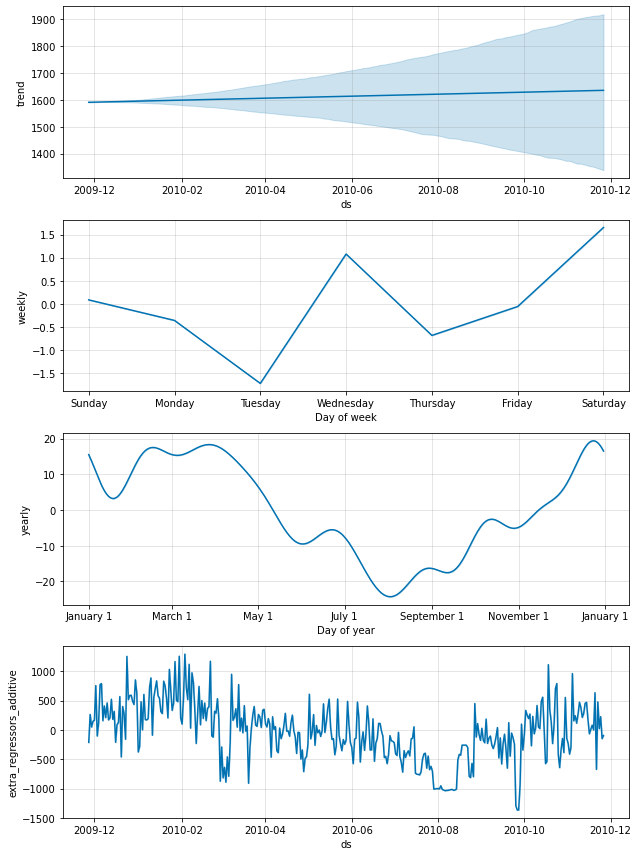

In [56]:
model.plot_components(prediction)